In [11]:
import shutil
# loading data into python structures
try:
    shutil.rmtree("data/dnd-cnn-split/train")
    shutil.rmtree("data/dnd-cnn-split/test")
except:
    pass

In [12]:
import os
# ensure directories exist
from pathlib import Path

Path("data/dnd-cnn-split/train/damage").mkdir(parents=True, exist_ok=True)
Path("data/dnd-cnn-split/train/no-damage").mkdir(parents=True, exist_ok=True)

Path("data/dnd-cnn-split/test/damage").mkdir(parents=True, exist_ok=True)
Path("data/dnd-cnn-split/test/no-damage").mkdir(parents=True, exist_ok=True)


In [13]:
all_damage_file_paths = os.listdir('dataset/Project3/damage')
all_no_damage_file_paths = os.listdir('dataset/Project3/no_damage')

In [14]:
import random

train_damage_paths = random.sample(all_damage_file_paths, int(len(all_damage_file_paths)*0.8))
print("train damage image count: ", len(train_damage_paths))
test_damage_paths = [ p for p in all_damage_file_paths if p not in train_damage_paths]
print("test damage image count: ", len(test_damage_paths))
# ensure no overlap:
overlap = [p for p in train_damage_paths if p in test_damage_paths]
print("len of overlap: ", len(overlap))


train_no_damage_paths = random.sample(all_no_damage_file_paths, int(len(all_no_damage_file_paths)*0.8))
print("train no damage image count: ", len(train_no_damage_paths))
test_no_damage_paths = [ p for p in all_no_damage_file_paths if p not in train_no_damage_paths]
print("test no damage image count: ", len(test_no_damage_paths))
# ensure no overlap:
overlap = [p for p in train_no_damage_paths if p in test_no_damage_paths]
print("len of overlap: ", len(overlap))


train damage image count:  11336
test damage image count:  2834
len of overlap:  0
train no damage image count:  5721
test no damage image count:  1431
len of overlap:  0


In [23]:
# ensure to copy the images to the directories
import shutil
for p in train_damage_paths:
    shutil.copyfile(os.path.join('dataset/Project3/damage', p), os.path.join('data/dnd-cnn-split/train/damage', p) )

for p in test_damage_paths:
    shutil.copyfile(os.path.join('dataset/Project3/damage', p), os.path.join('data/dnd-cnn-split/test/damage', p) )

for p in train_no_damage_paths:
    shutil.copyfile(os.path.join('dataset/Project3/no_damage', p), os.path.join('data/dnd-cnn-split/train/no-damage', p) )

for p in test_no_damage_paths:
    shutil.copyfile(os.path.join('dataset/Project3/no_damage', p), os.path.join('data/dnd-cnn-split/test/no-damage', p) )



# check counts:
print("Files in train/damage: ", len(os.listdir("data/dnd-cnn-split/train/damage")))
print("Files in train/no-damage: ", len(os.listdir("data/dnd-cnn-split/train/no-damage")))

print("Files in test/damage: ", len(os.listdir("data/dnd-cnn-split/test/damage")))
print("Files in test/no-damage: ", len(os.listdir("data/dnd-cnn-split/test/no-damage")))

# shape of damage and no damage training/testing files


Files in train/damage:  11336
Files in train/no-damage:  5721
Files in test/damage:  2834
Files in test/no-damage:  1431


In [22]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

# path to training data
train_data_dir = 'data/dnd-cnn-split/train'

# controls the size of the "batches" of images streamed when accessing the datasets.
# this is useful to control the memory usage with very large datasets
batch_size = 32

# target image size
img_height = 150
img_width = 150

# note that the subset parameter can take values of "training", "validation", or "both";
# the value dictates which dataset is returned (we want both)
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
# rescale instance
rescale = Rescaling(scale=1.0/255)

# apply the rescale to the train and validation sets
train_rescale_ds = train_ds.map(lambda image,label:(rescale(image),label))
val_rescale_ds = val_ds.map(lambda image,label:(rescale(image),label))


Found 17057 files belonging to 2 classes.
Using 13646 files for training.
Using 3411 files for validation.


In [24]:
# path to test data
test_data_dir = 'data/dnd-cnn-split/test/'

# we do not set subset=both here because we do not want the test set split
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    seed=123,
    image_size=(img_height, img_width),
)

# approach 1: manually rescale data --
rescale = Rescaling(scale=1.0/255)
test_rescale_ds = test_ds.map(lambda image,label:(rescale(image),label))

Found 4265 files belonging to 2 classes.


In [25]:
for images, labels in train_ds.take(1):  # Take one batch
    print("Train batch shape:", images.shape)  # Shape: (batch_size, height, width, channels)
    print("Train labels shape:", labels.shape)  # Shape: (batch_size,)


Train batch shape: (32, 150, 150, 3)
Train labels shape: (32,)


In [26]:
for images, labels in test_ds.take(1):
    print("Test batch shape:", images.shape)
    print("Test labels shape:", labels.shape)


Test batch shape: (32, 150, 150, 3)
Test labels shape: (32,)


Label for each of the above images: [0 1 1 0 0]


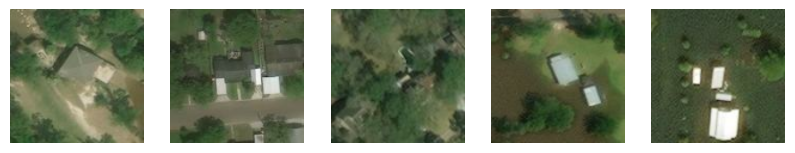

In [29]:
import matplotlib.pyplot as plt

# Get one batch of images and labels from the rescaled dataset
for images, labels in train_rescale_ds.take(1):  
    X_train_batch = images.numpy()  # Convert to NumPy array
    y_train_batch = labels.numpy()  # Convert labels to NumPy
    break

# Plot the first 5 images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train_batch[i])  # No need for uint8 conversion since values are [0,1]
    plt.axis("off")

print('Label for each of the above images:', y_train_batch[:5])
